In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import random
from Utils import *
import matplotlib.pyplot as plt
%matplotlib inline
initialization()

In [5]:
X0

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [6]:
#t=np.arange(0,289)
#Sunspot=10*np.sin(t/10)

Sunspot=pd.read_excel("Sunspot_series.xls", header=None)[1].values[0:-1]
Sc=MinMaxScaler(feature_range=(-.8, .8))
Sunspot_normed=Sc.fit_transform(Sunspot.reshape(-1, 1))
Data=Sunspot_normed.copy() # normalized data

n_training=221

y_a=Sc.inverse_transform(Data) #actual data

Train_orig=y_a[:n_training]  #y_a
Test_orig=y_a[n_training:]#Sunspot_normed


Error, MinFit,MaxFit,AvgFit,UNI,Train_predict,Test_predict,Network=Evolution(Data,y_a,n_training,Sc)

In [7]:
Error.tail()

,Train MSE,Train MAE,Test MSE,Test MAE
1995,154.232,9.2741,341.057,13.3887
1996,154.232,9.26461,341.711,13.4134
1997,154.227,9.2725,341.905,13.401
1998,154.171,9.26494,341.41,13.4023
1999,154.171,9.26494,341.41,13.4023


Train MSE    179.715
Train MAE    10.1144
Test MSE      317.91
Test MAE     12.8811
Name: 1270, dtype: object


1270

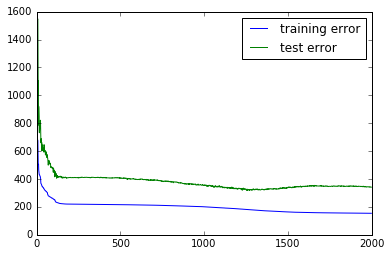

In [8]:
plt.plot(Error['Train MSE'],label='training error')
plt.hold('on')
plt.plot(Error['Test MSE'],label='test error')
plt.legend()
x=np.argmin(Error['Test MSE'])
Finalnet=Network[x]
print(Error.iloc[x])
x

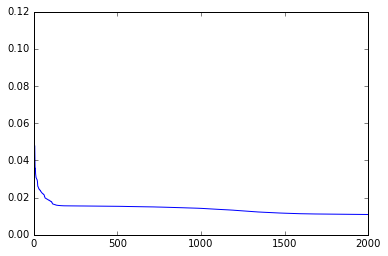

In [13]:
#plt.plot(AvgFit)
#plt.hold('on')
plt.plot(MinFit)
#plt.hold('on')
#plt.plot(MaxFit)
#plt.plot(UNI)
#print(min(Fitness))

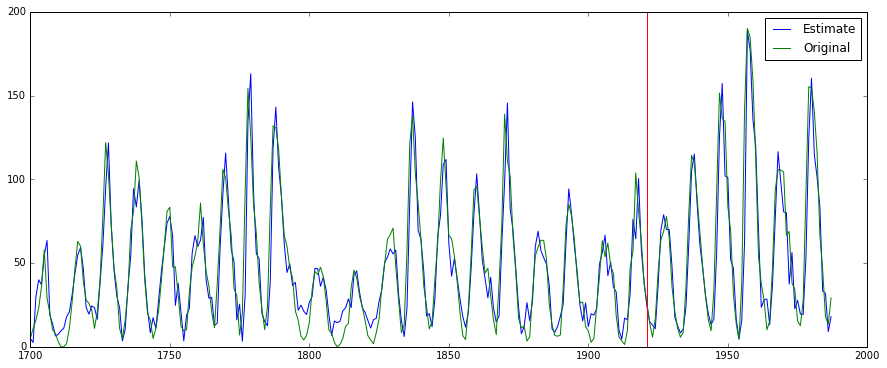

In [10]:

y_p,Finalnet=Evaluate([Finalnet],1,X0,Data,Sc) 
Gragh_pannet(Finalnet)    

plt.figure(figsize=[15,6])
plt.plot(np.arange(1700,1987+1),y_p,label='Estimate')
plt.hold('on')
plt.plot(np.arange(1700,1987+1),Sunspot,label='Original')
plt.legend()
plt.axvline(x=1700+221,color='r') 

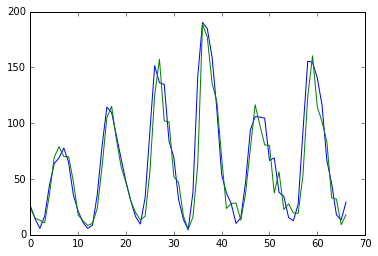

In [11]:
plt.plot(Test_orig)
plt.hold('on')
plt.plot(y_p[n_training:])

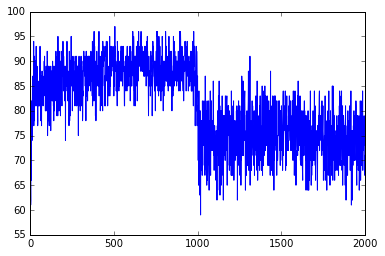

In [14]:
plt.plot(UNI)

In [15]:
Finalnet

array([  7.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         5.00000000e+00,   0.00000000e+00,   6.00000000e+00,
         4.00000000e+00,   1.00000000e+00,   7.00000000e+00,
         3.00000000e+00,   0.00000000e+00,   7.00000000e+00,
         6.00000000e+00,   2.00000000e+00,   4.00000000e+00,
         5.00000000e+00,   1.85442779e-01,   4.72777237e-01,
        -1.53888429e-01,   5.16758985e-01,  -3.66945064e-01,
         1.27992499e-01,  -4.00505901e-01,   4.22736426e-01,
        -3.84892853e-01,  -5.13454518e-01,   3.46414240e-01,
         6.10958392e-02,  -1.62251971e-01,   6.00000000e+00,
         7.00000000e+00,   5.00000000e+00,   0.00000000e+00,
         6.00000000e+00,   4.00000000e+00,   1.00000000e+00,
         7.00000000e+00,   3.00000000e+00,   0.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   2.00000000e+00,
         4.00000000e+00,   5.00000000e+00,   2.76054788e-01,
         4.57003399e-01,  -1.58006203e-01,   4.96686434e-01,
        -3.76010498e-01,

In [13]:
"""
%%timeit
for i in range(0,PopSize):
    Fitness[i],x_hat_fit=CalcFitness(Pop[i],TrainingData,X0.copy())
%%timeit
[CalcFitness(i,TrainingData,X0) for i in Pop]
"""


'\n%%timeit\nfor i in range(0,PopSize):\n    Fitness[i],x_hat_fit=CalcFitness(Pop[i],TrainingData,X0.copy())\n%%timeit\n[CalcFitness(i,TrainingData,X0) for i in Pop]\n'